# Exploratory Data Analysis – E-commerce Fraud Data

**Dataset:** Fraud_Data.csv  
**Objective:**  
Initial inspection of structure, data types, missing values, and basic characteristics
to inform data cleaning and feature engineering decisions.


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", "{:.4f}".format)


In [15]:
fraud_df = pd.read_csv("../data/raw/Fraud_Data.csv")
fraud_df.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368.7997,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387.8659,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820.1109,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443.9140,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117.4527,0


In [4]:
fraud_df.shape


(151112, 11)

In [5]:
fraud_df.columns


Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')

In [6]:
fraud_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [7]:
fraud_df.isnull().sum()


user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [8]:
fraud_df.describe()


,user_id,purchase_value,age,ip_address,class
count,151112.0000,151112.0000,151112.0000,151112.0000,151112.0000
mean,200171.0410,36.9354,33.1407,2152145330.9588,0.0936
std,115369.2850,18.3228,8.6177,1248497030.1004,0.2913
min,2.0000,9.0000,18.0000,52093.4969,0.0000
25%,100642.5000,22.0000,27.0000,1085933882.5316,0.0000
50%,199958.0000,35.0000,33.0000,2154770162.4066,0.0000
75%,300054.0000,49.0000,39.0000,3243257679.7225,0.0000
max,400000.0000,154.0000,76.0000,4294850499.6788,1.0000


In [9]:
fraud_df.select_dtypes(include="object").nunique()


signup_time      151112
purchase_time    150679
device_id        137956
source                3
browser               5
sex                   2
dtype: int64

In [10]:
fraud_df["class"].value_counts()


class
0    136961
1     14151
Name: count, dtype: int64

In [12]:
fraud_df["class"].value_counts(normalize=True) * 100


class
0   90.6354
1    9.3646
Name: proportion, dtype: float64

In [17]:
fraud_df["age"].fillna(fraud_df["age"].median(), inplace=True)
fraud_df["purchase_value"].fillna(fraud_df["purchase_value"].median(), inplace=True)

fraud_df["browser"].fillna(fraud_df["browser"].mode()[0], inplace=True)
fraud_df["source"].fillna(fraud_df["source"].mode()[0], inplace=True)


/tmp/ipykernel_64697/3361702659.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fraud_df["age"].fillna(fraud_df["age"].median(), inplace=True)
/tmp/ipykernel_64697/3361702659.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [18]:
fraud_df.duplicated().sum()

fraud_df = fraud_df.drop_duplicates()

fraud_df = fraud_df.drop_duplicates(
    subset=["user_id", "device_id", "purchase_time"]
)


In [19]:
fraud_df["signup_time"] = pd.to_datetime(fraud_df["signup_time"])
fraud_df["purchase_time"] = pd.to_datetime(fraud_df["purchase_time"])
fraud_df["ip_address"] = fraud_df["ip_address"].astype(int)
fraud_df["class"] = fraud_df["class"].astype(int)


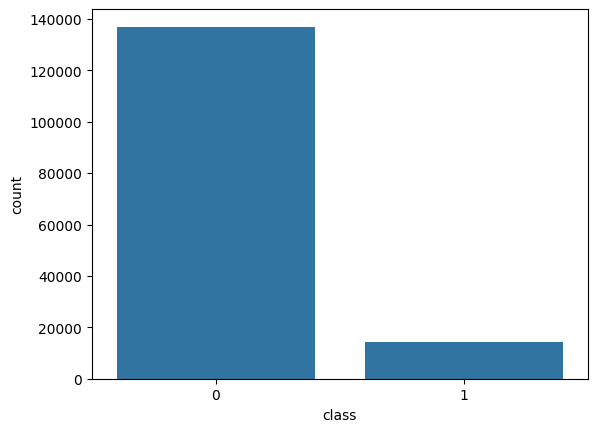

In [20]:
fraud_df["class"].value_counts(normalize=True) * 100
sns.countplot(x="class", data=fraud_df)
plt.show()

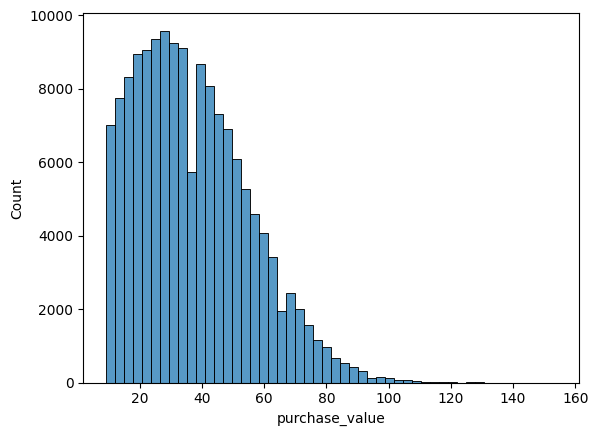

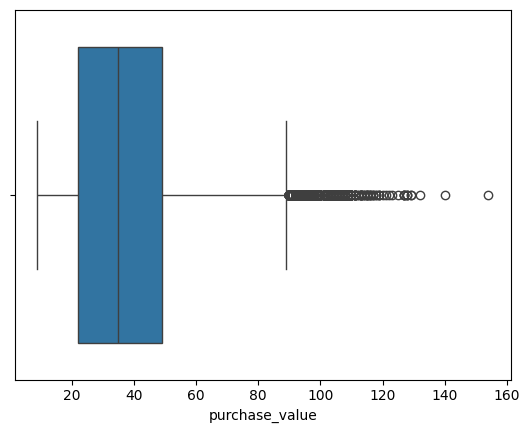

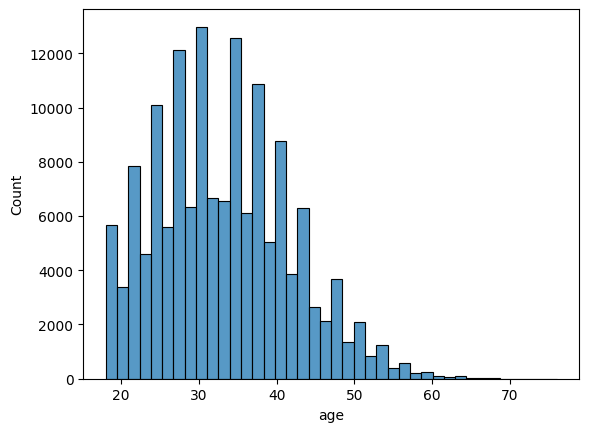

In [21]:
sns.histplot(fraud_df["purchase_value"], bins=50)
plt.show()

sns.boxplot(x=fraud_df["purchase_value"])
plt.show()

sns.histplot(fraud_df["age"], bins=40)
plt.show()

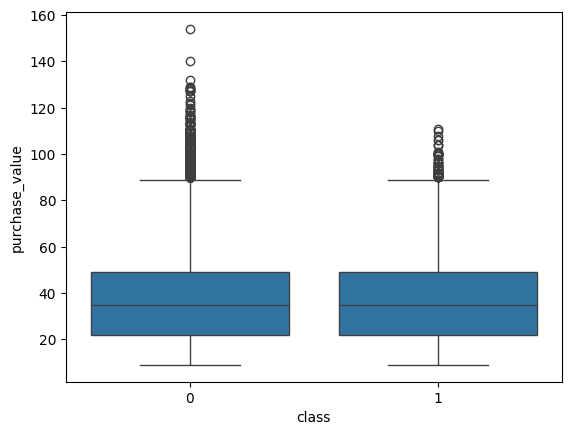

sex
F   0.0910
M   0.0955
Name: class, dtype: float64

In [22]:
sns.boxplot(x="class", y="purchase_value", data=fraud_df)
plt.show()

fraud_df.groupby("browser")["class"].mean()

fraud_df.groupby("source")["class"].mean()

fraud_df.groupby("sex")["class"].mean()


In [23]:
ip_df = pd.read_csv("../data/raw/IpAddress_to_Country.csv")

ip_df["lower_bound_ip_address"] = ip_df["lower_bound_ip_address"].astype(int)
ip_df["upper_bound_ip_address"] = ip_df["upper_bound_ip_address"].astype(int)

ip_df = ip_df.sort_values("lower_bound_ip_address")


In [24]:
def map_country(ip):
    match = ip_df[
        (ip_df["lower_bound_ip_address"] <= ip) &
        (ip_df["upper_bound_ip_address"] >= ip)
    ]
    return match.iloc[0]["country"] if not match.empty else "Unknown"

fraud_df["country"] = fraud_df["ip_address"].apply(map_country)


In [25]:
fraud_df.groupby("country")["class"].mean().sort_values(ascending=False).head(10)


country
Turkmenistan            1.0000
Namibia                 0.4348
Sri Lanka               0.4194
Luxembourg              0.3889
Virgin Islands (U.S.)   0.3333
Ecuador                 0.2642
Tunisia                 0.2627
Peru                    0.2605
Bolivia                 0.2453
Kuwait                  0.2333
Name: class, dtype: float64